# Data Cleaning

In [1]:
# import library dan modul
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from matplotlib import *
import sys
from pylab import *

In [2]:
# load dataset
df = pd.read_csv('Iris_unclean.csv')
df

,Unnamed: 0,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,NaN,3.5,1.4,0.2,Iris-setosa
1,1,4.9,2000.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,-1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Iris-virginica
146,146,6.3,2.5,5.0,1.9,Iris-virginica
147,147,6.5,3.0,5.2,2.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# menghapus kolom 'Unnamed'
df = df.drop('Unnamed: 0', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,NaN,3.5,1.4,0.2,Iris-setosa
1,4.9,2000.0,1.4,0.2,Iris-setosa
2,4.7,3.2,-1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# cek ukuran dataset
df.shape

(150, 5)

In [5]:
# cek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  148 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# cek deskripsi statistik dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,148.000000,150.000000,150.000000,150.000000
mean,5.856757,26.348000,3.721333,1.198667
std,0.824964,203.117929,1.842364,0.763161
min,4.300000,2.000000,-1.500000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.375000,5.100000,1.800000
max,7.900000,2000.000000,6.900000,2.500000


In [7]:
# cek nilai yang hilang (missing value)
df.isnull().sum()

SepalLengthCm    2
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## <font color = 'green'> 1. Cek Kolom SepalLengthCm

In [8]:
# cek deksrispi statistik
df['SepalLengthCm'].describe()

count    148.000000
mean       5.856757
std        0.824964
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

In [9]:
# cek jumlah nilai NaN pada kolom SepalLengthCm
df['SepalLengthCm'].isnull().sum()

2

In [10]:
# mencari nilai index dari missing value
index_nan = np.where(df['SepalLengthCm'].isna())
index_nan

(array([0, 6], dtype=int64),)

In [11]:
# menghapus baris yang memiliki missing value
df = df.dropna(axis=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,4.9,2000.0,1.4,0.2,Iris-setosa
2,4.7,3.2,-1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
# cek ukuran dataset
df.shape

(148, 5)

In [13]:
# membuat fungsi untuk melihat data outliers
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [14]:
# cek outlier dari kolom SepalLengthCm
detect_outliers(df, 'SepalLengthCm')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


## <font color = 'green'> 2. Cek Kolom SepalWidthCm

In [15]:
# cek deskripsi statistik 
df['SepalWidthCm'].describe()

count     148.000000
mean       26.657432
std       204.477337
min         2.000000
25%         2.800000
50%         3.000000
75%         3.300000
max      2000.000000
Name: SepalWidthCm, dtype: float64

In [16]:
# melihat data outliers dari kolom SepalWidthCm
detect_outliers(df, 'SepalWidthCm')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,4.9,2000.0,1.4,0.2,Iris-setosa
8,4.4,1500.0,1.4,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2000.0, 0.4, 'Outlier')

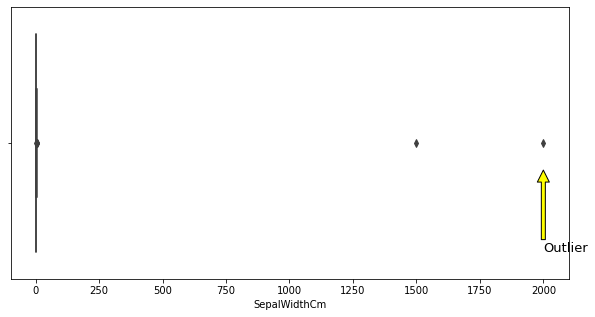

In [17]:
# mendeteksi outliers dengan boxplot pada kolom SepalWidthCm
plt.figure(figsize=(10,5))
sns.boxplot(df['SepalWidthCm'])
plt.annotate('Outlier', (df['SepalWidthCm'].describe()['max'],0.1), xytext = (df['SepalWidthCm'].describe()['max'],0.4),
             arrowprops = dict(facecolor = 'yellow'), fontsize = 13 )

In [18]:
# menghapus baris yang memiliki nilai outliers
df = df.drop(detect_outliers(df, 'SepalWidthCm').index, axis=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
2,4.7,3.2,-1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
7,5.0,3.4,-1.5,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
# cek ukuran dataset
df.shape

(142, 5)

In [20]:
# cek ulang outlier dengan fungsi
detect_outlier(df, 'SepalWidthCm')

NameError: name 'detect_outlier' is not defined

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

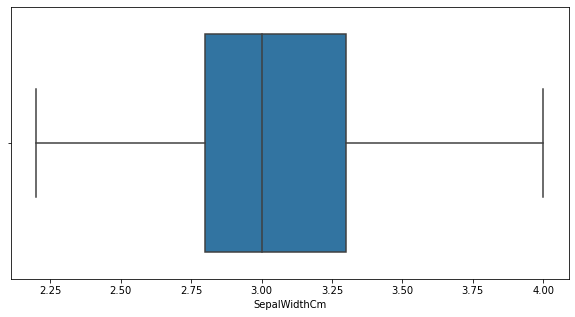

In [21]:
# cek ulang outlier dengan boxplot
plt.figure(figsize = (10, 5))
sns.boxplot(df['SepalWidthCm'])

## <font color = 'green'> 3. Cek Kolom PetalLengthCm

In [22]:
# Cek deskripsi statistik PetalLengthCm
df['PetalLengthCm'].describe()

count    142.000000
mean       3.835915
std        1.819958
min       -1.500000
25%        1.600000
50%        4.450000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64

In [23]:
# periksa nilai negatif PetalLengthCm
df[df['PetalLengthCm']<0]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
2,4.7,3.2,-1.3,0.2,Iris-setosa
7,5.0,3.4,-1.5,0.2,Iris-setosa


In [24]:
# menghapus baris yang memiliki nilai negatif
df = df.drop(df[df['PetalLengthCm']<0].index, axis=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
# cek ukuran dataset
df.shape

(140, 5)

In [26]:
# cek outlier dari kolom PetalLengthCm
detect_outliers(df, 'PetalLengthCm')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


## <font color = 'olive'> Cek Dataset Setelah Proses Cleaning

In [27]:
# cek ulang informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 3 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  140 non-null    float64
 1   SepalWidthCm   140 non-null    float64
 2   PetalLengthCm  140 non-null    float64
 3   PetalWidthCm   140 non-null    float64
 4   Species        140 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.6+ KB


In [28]:
# cek ulang deskripsi statistik datset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,140.000000,140.000000,140.000000,140.000000
mean,5.902857,3.028571,3.910714,1.262857
std,0.819365,0.398791,1.720369,0.746825
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.675000,0.400000
50%,5.850000,3.000000,4.500000,1.400000
75%,6.425000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [29]:
# cek ulang nilai missing value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [30]:
# menampikan 10 baris awal dataset setelah proses cleaning
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
